# Tasca base de dades NoSQL

**Exercici 1**

Crea una base de dades NoSQL utilitzant MongoDB. Afegeix-li algunes dades d'exemple que et permetin comprovar que ets capaç de processar-ne la informació de manera bàsica.

**Exercici 2**

Connecta la base de dades NoSQL a Python utilitzant per exemple pymongo.

**Exercici 3**

Carega algunes consultes senzilles a un Pandas Dataframe. 

**Exercici 4**

Genera un resum estadístic de la informació que conté la base de dades.

In [1]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient

### Exercici 1

Create a MongoDB Atlas account or install a Local MongoDB Server

### Exercici 2

In [2]:
## --------
## REMOTE not working bc I don't want to put my password
## --------

## URI server ATLAS
password = "********"
uri = "mongodb+srv://luismartin:" + password + \
    "@cluster0.fvd8a.mongodb.net/myFirstDatabase?retryWrites=true&w=majority"
    
## Conect
cluster = MongoClient(uri)

In [9]:
## --------
## LOCAL
## --------

## First initiate your local server
cluster = MongoClient('localhost', 27017)

### Exercici 3

In [10]:
## Database
db = cluster["ItAcademy"]

## Collection 
collection = db["Sprint18"]

## Atributs
names_list = ["Enric", "Maria", "Jaume", "Sílvia", "Luis", "Reme", "Pol", "Marc", "Marta", "Mireia", 
              "Arnau", "Alba", "Joan", "Vanna", "David", "Agustín", "Queralt", "Isaam", "Samir", "Sebas", 
              "Alex", "Anna", "Isabel", "Sonia", "Gerard", "Álvaro", "Miriam", "Marina", "Cristina", "Claudia",
              "Judit", "Nora", "Edu", "Manel", "Paula", "Hugo", "Valentina", "Josep", "Júlia", "Gemma"]

surnames_list = ["Martos", "Paricio", "Sánchez", "Prats", "Martin", "Soler", "Rabetlla", "Font", 
                 "Xifra", "Puig", "Figueres", "Comet", "Suárez", "Prado", "Portús", "Álvarez", 
                 "Pons", "Franc", "Serra", "Vivanco", "Diaz", "Daniel", "Borrego", "de Pablo", 
                 "Di Marco", "Rodríguez", "Bosch", "Lorien", "Albets", "Benítez", "Calderero", "Mompart"]

tags_list = ["Fútbol", "Básquet", "Hokey", "Tenis", "Natación", "Atletísmo", "Waterpolo", "Ciclismo",
             "Ingés", "Francés", "Aleman", "Italiano", "Matmáticas", "Música", "Guitarra", "Piano",
             "Batería", "Escalada", "Teatro", "Cerámica", "Dibujo", "Cocina", "Lectura", "Programación"]

## Inster
for ii in range(500):
    collection.insert_one({
        "_id": ii,
        "name": np.random.choice(names_list),
        "surname_1": np.random.choice(surnames_list),
        "surname_2": np.random.choice(surnames_list),
        "notes": round(np.random.normal(7, 1), 2),
        "height": round(np.random.normal(1.7, 0.1), 2),
        "weight": round(np.random.normal(70, 15), 2),
        "tags": list(np.random.choice(tags_list, 3))
    })

In [11]:
## Find and export
results = collection.find()
df =  pd.DataFrame(list(results))
display(df.head())

,_id,name,surname_1,surname_2,notes,height,weight,tags
0,0,Isabel,Xifra,Mompart,6.47,1.79,74.51,"[Teatro, Batería, Lectura]"
1,1,Manel,Sánchez,Martin,6.40,1.73,41.68,"[Guitarra, Aleman, Piano]"
2,2,Cristina,Sánchez,Franc,6.33,1.70,77.96,"[Matmáticas, Waterpolo, Ciclismo]"
3,3,Samir,Font,Prado,7.21,1.62,73.49,"[Aleman, Aleman, Tenis]"
4,4,Maria,Pons,Serra,6.43,1.76,87.43,"[Fútbol, Batería, Waterpolo]"


In [12]:
## How many play Fútbol
results = collection.find({"tags": "Fútbol"})
df_futbol =  pd.DataFrame(list(results))
print("{} personas juegan a fútbol".format(len(df_futbol)))

## How many Bosch play any instrument
results = collection.find({"$and": [
    {"$or": [
        {"tags": "Guitarra"}, 
        {"tags": "Piano"}, 
        {"tags": "Batería"}]},
    {"$or": [
        {"surname_1": "Bosch"}, 
        {"surname_2": "Bosch"}]}
]})
df_music =  pd.DataFrame(list(results))
print("{} personas que se apellidan Bosch tocan algún instrumento".format(len(df_music)))

59 personas juegan a fútbol
12 personas que se apellidan Bosch tocan algún instrumento


### Exercici 4

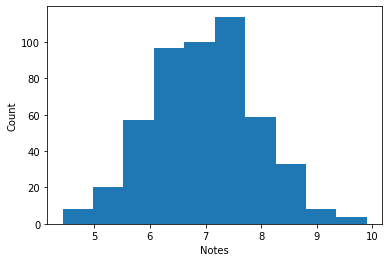

In [13]:
# Notes histogram
df.notes.plot(kind="hist", bins=10);
plt.xlabel("Notes");
plt.ylabel("Count");

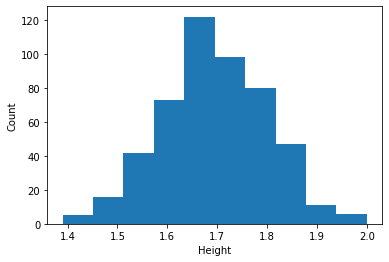

In [14]:
# Heigh histogram
df.height.plot(kind="hist", bins=10);
plt.xlabel("Height");
plt.ylabel("Count");

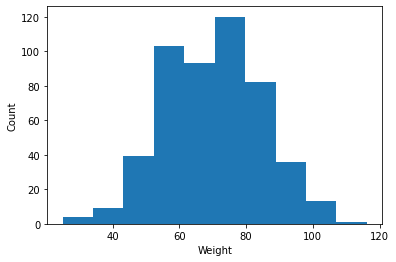

In [15]:
# Weigh histogram
df.weight.plot(kind="hist", bins=10);
plt.xlabel("Weight");
plt.ylabel("Count");